In [63]:
from adtk.detector import SeasonalAD
from adtk.data import validate_series
from adtk.visualization import plot
import matplotlib as plt
import pandas as pd

<h1 style="text-align: center;">Anomaly Detection Toolkit (movement outliers)</h1>


In [72]:
data = pd.read_csv("sleeping_data_not_normal.csv")


data['date'] = pd.to_datetime(data['date'])
data = data.set_index("date")

# Select the 'x' column
data = data["z"]

In [73]:
print(data)

date
2024-03-22 21:14:26.927464   -6.96
2024-03-22 21:14:27.334157   -5.89
2024-03-22 21:14:28.342504   -4.61
2024-03-22 21:14:29.333043   -3.38
2024-03-22 21:14:30.315541    3.61
                              ... 
2024-03-22 21:16:21.312772    0.29
2024-03-22 21:16:22.528336   -2.08
2024-03-22 21:16:23.259309    0.59
2024-03-22 21:16:24.290579    0.17
2024-03-22 21:16:25.502654   -0.24
Name: z, Length: 120, dtype: float64


In [74]:
s_train = validate_series(data)

C:\Users\hugod\anaconda3\Lib\site-packages\adtk\data\_data.py:164: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for t, v in time_window_end_series.iteritems():  # type: pd.Timestamp, int


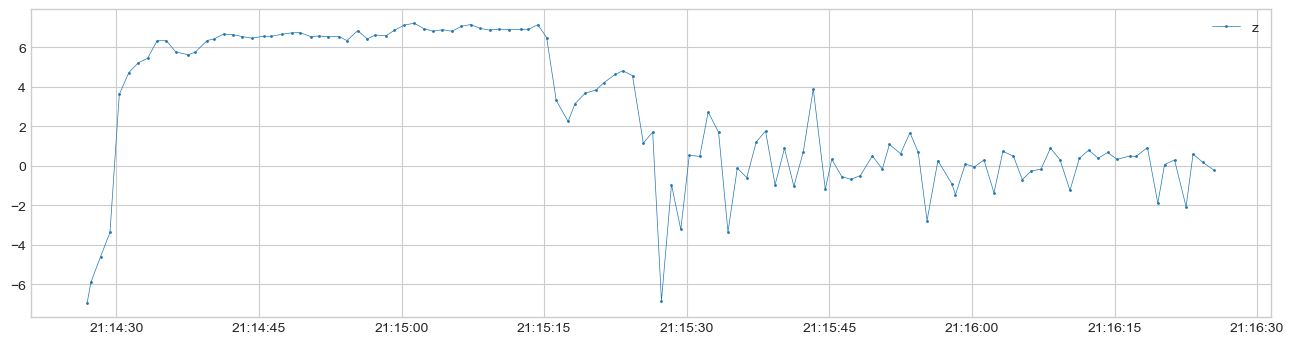

In [75]:
from adtk.detector import LevelShiftAD
level_shift_ad = LevelShiftAD(c=9, side='both', window=8)
anomalies = level_shift_ad.fit_detect(s_train)
plot(s_train, anomaly=anomalies, anomaly_color='red');

In [62]:
from adtk.detector import OutlierDetector
from sklearn.neighbors import LocalOutlierFactor

# Initialize Outlier Detector with LocalOutlierFactor
outlier_detector = OutlierDetector(LocalOutlierFactor(contamination=0.1))

# Convert s_train to a DataFrame
s_train_df = s_train.to_frame()

# Fit and detect anomalies on s_train_df
anomalies = outlier_detector.fit_detect(s_train_df)

# Convert anomalies to DataFrame
anomalies_df = anomalies.to_frame()


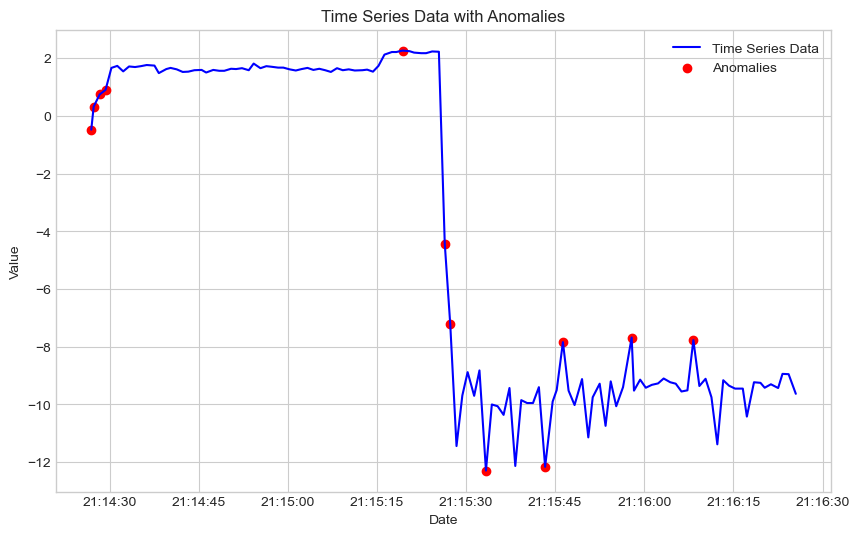

In [50]:
import matplotlib.pyplot as plt

# Plot the time series data
plt.figure(figsize=(10, 6))
plt.plot(s_train_df.index, s_train_df.values, label='Time Series Data', color='blue')

# Highlight anomalies
anomalies_indices = anomalies[anomalies == True].index
plt.scatter(anomalies_indices, s_train_df.loc[anomalies_indices], color='red', label='Anomalies')

# Customize plot
plt.title('Time Series Data with Anomalies')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()
